![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [6]:
bikes.groupby('workingday').total.describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


### Análisis e inferencias

Según el dataframe anterior, se observa que a pesar de que hay mas pocos días de fines de semana y feriados (30% mas o menos del total de los datos), la cantidad de alquiler de biciletas en promedio es casi igual entre semana que los fines de semana, una razón a esto podría ser debido a que las personas aprovechan sus dias de descanso y tiempo libre para pasear y alquilar biciletas para hacer viajes y recorridos.


In [7]:
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


### Análisis e inferencias

Como se puede observar en el dataframe de la celda anterior, en la madrugada es donde se presenta un menor número de alquiler de biciceltas, si observamos la columna de promedio "mean" de las filas del dataframe las cuales representan la agrupación de los datos por las diferentes horas del día, se aprecia valores mayores en las horas del día, donde hay algunos intervalos de tiempo donde mas se presenta el pico del alquiler de biciletas, por ejemplo entre 8 y 9 a.m el alquiler es alto, pero el número de alquileres más elevados se presentan entre las 4 de la tarde y 7 de la noche aproximadamente.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

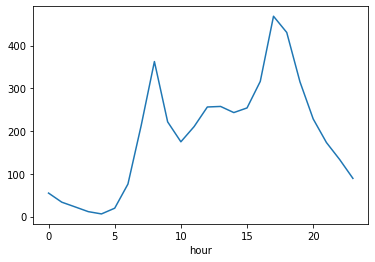

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

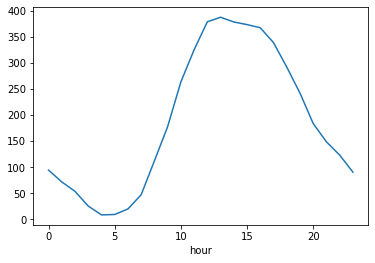

In [9]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 

filtro_0 = bikes["workingday"] == 0
workingday_0 = bikes[filtro_0]

workingday_0.groupby('hour').total.mean().plot()


### Análisis e inferencias

En la gráfica anterior se puede apreciar que los fines de semana y los dias feriados la demanda de alquiler de biciletas empieza a aumentar en horas de la mañana alcazando su máxima demanda en promedio al rededor entre las 12 y 1 de la tarde proximadamente, en horas de la noche la demanda de alquiler se reduce. La gráfica anterior es caracterisada por ser una gráfica suave.

<AxesSubplot:xlabel='hour'>

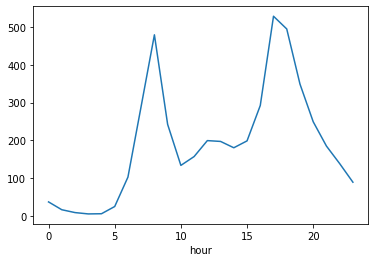

In [10]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 

filtro_1 = bikes["workingday"] == 1
workingday_1 = bikes[filtro_1]

workingday_1.groupby('hour').total.mean().plot()


### Análisis e inferencias

En la gráfica anterior se puede apreciar que entre semana la demanda de alquiler de biciletas presenta dos picos máximos, uno entre las 8 y 9 de la manana y otro entre las 5 y 6 de la tarde aproximadamente, en horas del medio dia la demanda disminuye pero presenta una reducción considerable en altas horas de la noche y horas de la madrugada. A diferencia de la grafica de los fines de semana y días feriados, los cambios en estos picos de demanda son mas bruscos, concluyendo así que entre semana el alquiler de bicicletas tiene a subir y bajar rápidamente. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [12]:
# Celda 3
# Celda 3
XTotal = bikes[['hour','workingday']]
yTotal = bikes['total']

Reg_model = LinearRegression()
Reg_model.fit(XTotal,yTotal)

print("Intercepto:", Reg_model.intercept_)
print("Coeficientes:", Reg_model.coef_)


Intercepto: 67.705950261916
Coeficientes: [10.49206282  4.07248627]


### Inferencias y conslusiones

Con la obtención de los coeficientes se puede observar que por cada hora el alquiler de las biciletas aumenta 10.492 unidades y por cada dia laborado aumentan un total de 4.072 unidades, con este modelo de regresión lineal no es posible interpretar y analizar la dependencia que pueda presentarse entre estas dos variables. 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [13]:
# Celda 4

# Importación de modelos de sklearn 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

XTotal = bikes[["hour","workingday"]]
yTotal = bikes[["total"]]

In [14]:
# Definición de parámetros y criterios de parada
max_depth = None # Maxima profundidad
num_pct = 10 # Numero de percentiles
max_features = None # Maximo numero de features
min_gain=0.001 # Ganancia mínima

In [15]:
# Impresión variable a usar (hour)
j = 0
print(XTotal.columns[j])

hour


In [16]:
# División de la variable hours en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(XTotal.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

array([ 0.,  2.,  4.,  7.,  9., 12., 14., 16., 19., 21.])

In [17]:
# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=5
filter_l = XTotal.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = yTotal.loc[filter_l]
y_r = yTotal.loc[~filter_l]

In [18]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [19]:
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

total   -27775.883008
dtype: float64

In [20]:
# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

total   -138889.233968
dtype: float64

In [21]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [22]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [23]:
type(yTotal)

pandas.core.frame.DataFrame

In [25]:
#best_split(XTotal, yTotal, 5)

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [27]:
# Celda 5


# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
MSE_scores = []


# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    reg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores.append(cross_val_score(reg, XTotal, yTotal, cv=10, scoring='neg_mean_squared_error').mean()*(-1))
    

Text(0, 0.5, 'MSE')

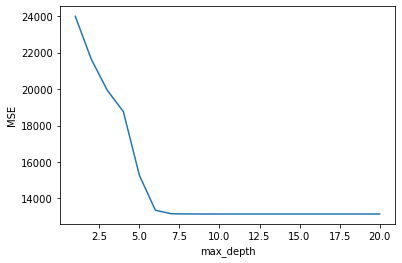

In [28]:
# Gráfica max_depth versus MSE (error del modelo)
plt.plot(max_depth_range, MSE_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [29]:
# MSE óptmimo (desempeño del modelo) y su correspondiente max_depth
#sorted(zip(MSE_scores, max_depth_range))[::-1][0]

temporal = min(MSE_scores)
depth = MSE_scores.index(temporal)
print("el MSE y la profundidad del modelo más óptimo son:",MSE_scores[depth],"y", depth)

el MSE y la profundidad del modelo más óptimo son: 13143.121883295113 y 9


In [30]:
# max_depth=9 fue la mejor profundidad, se ajusta un árbol usando este valor 
reg = DecisionTreeClassifier(max_depth=depth, random_state=1)
reg.fit(XTotal, yTotal)

DecisionTreeClassifier(max_depth=9, random_state=1)

In [31]:
# Impresión de resultados de desemepeño del árbol de decisión
pd.Series(cross_val_score(reg, XTotal, yTotal, cv=10)).describe()

count    10.000000
mean      0.018372
std       0.005390
min       0.006428
25%       0.016074
50%       0.020221
75%       0.021809
max       0.023875
dtype: float64

### Análisis e inferencias

Este árbol de desición fue estimado utilizando la profundidad como parámetro de calibración, en este orden de ideas, se utilizó como métrica de desempeño el MSE ya que se trataba de un problema de regresión. Así puede se halló el valor del MSE más optimo con diferentes valores de profundidad, y se utilizó esta profundidad óptima para estimar el nuevo modelo calibrado.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [32]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [33]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [34]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [48]:
# Celda 6
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import metrics


#ÁRBOL DE DESICIÓN

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 40)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())


In [49]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

# max_depth=2 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)

print('El F1 score del arbol de decision es:',round(metrics.f1_score(y_pred1, y_test),4))
print('El Accuracy del arbol de decision es:',round(metrics.accuracy_score(y_pred1, y_test),4))

El F1 score del arbol de decision es: 0.6449
El Accuracy del arbol de decision es: 0.6453


In [50]:
#MODELO DE REGRESIÓN LOGÍSTICA

clf2 = LogisticRegression()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)


print('El F1 score para la regresion logistica es:',round(metrics.f1_score(y_pred2, y_test),4))
print('El Accuracy para la regresion logistica es:',round(metrics.accuracy_score(y_pred2, y_test),4))

El F1 score para la regresion logistica es: 0.6101
El Accuracy para la regresion logistica es: 0.614


### Análisis e inferencias

Se observa que el modelo que mejor desempeño alcanza es el de árboles de desición, ya que el F1 score y el accuracy son mas altos, este árbol de desición fue estimado calibrando la profundidad como parámetro

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [53]:
# Celda 7
from sklearn.ensemble import BaggingClassifier

#100 árboles de decisión con max_depth = None

clf_Bg_1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,max_samples=300,
                        random_state=42, oob_score=True)

clf_Bg_1.fit(X_train, y_train)
y_pred_Bg_1 = clf_Bg_1.predict(X_test)

f1score_1 = metrics.f1_score(y_pred_Bg_1, y_test)
Accuracy_1 =  metrics.accuracy_score(y_pred_Bg_1, y_test)

print('PRIMER ESCENARIO:\n')
print('F1 score:',round(f1score_1,5))
print('Accuracy:',round(Accuracy_1,5))

PRIMER ESCENARIO:

F1 score: 0.65676
Accuracy: 0.66133


In [54]:
#100 árboles de decisión donde max_depth = 2

clf_Bg_2 = BaggingClassifier(base_estimator=DecisionTreeClassifier( max_depth = 2), n_estimators=100, bootstrap=True,max_samples=300,
                        random_state=42, oob_score=True)

clf_Bg_2.fit(X_train, y_train)
y_pred_Bg_2 = clf_Bg_2.predict(X_test)

f1score_2 = metrics.f1_score(y_pred_Bg_2, y_test)
Accuracy_2 =  metrics.accuracy_score(y_pred_Bg_2, y_test)

print('SEGUNDO ESCENARIO:\n')
print('F1 score:',round(f1score_2,4))
print('Accuracy:',round(Accuracy_2,4))

SEGUNDO ESCENARIO:

F1 score: 0.6316
Accuracy: 0.6453


In [55]:
#100 regresiones logisticas

clf_Bg_3 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,max_samples=300,
                        random_state=42, oob_score=True)
clf_Bg_3.fit(X_train, y_train)
y_pred_Bg_3 = clf_Bg_3.predict(X_test)

f1score_3 = metrics.f1_score(y_pred_Bg_3, y_test)
Accuracy_3 = metrics.accuracy_score(y_pred_Bg_3, y_test) 

print('TERCER ESCENARIO:\n')
print('F1 score:',round(f1score_3,4))
print('Accuracy:',round(Accuracy_3,4))

TERCER ESCENARIO:

F1 score: 0.6142
Accuracy: 0.6207


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [56]:
# Celda 8

#100 árboles de decisión donde max_depth = None

clf_Bg_4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,max_samples=300,
                        random_state=42, oob_score=True)

clf_Bg_4.fit(X_train, y_train)
y_pred_Bg_4 = clf_Bg_4.predict(X_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors4 = np.zeros(clf_Bg_4.n_estimators)
y_pred_all_4 = np.zeros((X_test.shape[0], clf_Bg_4.n_estimators))

for i in range(clf_Bg_4.n_estimators):
    oob_sample = ~clf_Bg_4.estimators_samples_[i]
    y_pred_4 = clf_Bg_4.estimators_[i].predict(X_train.values[oob_sample])
    errors4[i] = metrics.accuracy_score(y_pred_4, y_train.values[oob_sample])
    y_pred_all_4[:, i] = clf_Bg_4.estimators_[i].predict(X_test)
    
alpha4 = (1 - errors4) / (1 - errors4).sum()
y_pred4 = (np.sum(y_pred_all_4 * alpha4, axis=1) >= 0.5).astype(np.int)

f1score_4 = metrics.f1_score(y_pred4, y_test)
Accuracy_4 =  metrics.accuracy_score(y_pred4, y_test)

print('PRIMER ESCENARIO:\n')
print('F1 score:',round(f1score_4,5))
print('Accuracy:',Accuracy_4)

PRIMER ESCENARIO:

F1 score: 0.66311
Accuracy: 0.6633333333333333


In [57]:
#100 árboles de decisión donde max_depth = 2

clf_Bg_5 = BaggingClassifier(base_estimator=DecisionTreeClassifier( max_depth = 2), n_estimators=100, bootstrap=True,max_samples=300,
                        random_state=42, oob_score=True)

clf_Bg_5.fit(X_train, y_train)
y_pred_Bg_5 = clf_Bg_5.predict(X_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors5 = np.zeros(clf_Bg_5.n_estimators)
y_pred_all_5 = np.zeros((X_test.shape[0], clf_Bg_5.n_estimators))

for i in range(clf_Bg_5.n_estimators):
    oob_sample = ~clf_Bg_4.estimators_samples_[i]
    y_pred_5 = clf_Bg_5.estimators_[i].predict(X_train.values[oob_sample])
    errors5[i] = metrics.accuracy_score(y_pred_5, y_train.values[oob_sample])
    y_pred_all_5[:, i] = clf_Bg_5.estimators_[i].predict(X_test)
    
alpha5 = (1 - errors5) / (1 - errors5).sum()
y_pred5 = (np.sum(y_pred_all_5 * alpha5, axis=1) >= 0.5).astype(np.int)

f1score_5 = metrics.f1_score(y_pred5, y_test)
Accuracy_5 =  metrics.accuracy_score(y_pred5, y_test)

print('SEGUNDO ESCENARIO:\n')
print('F1 score:',round(f1score_5,4))
print('Accuracy:',round(Accuracy_5,4))

SEGUNDO ESCENARIO:

F1 score: 0.6325
Accuracy: 0.6467


In [44]:
#100 regresiones logisticas 

clf_Bg_6 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,max_samples=300,
                        random_state=42, oob_score=True)
clf_Bg_6.fit(X_train, y_train)
y_pred_Bg_6 = clf_Bg_6.predict(X_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors6 = np.zeros(clf_Bg_6.n_estimators)
y_pred_all_6 = np.zeros((X_test.shape[0], clf_Bg_6.n_estimators))

for i in range(clf_Bg_6.n_estimators):
    oob_sample = ~clf_Bg_6.estimators_samples_[i]
    y_pred_6 = clf_Bg_6.estimators_[i].predict(X_train.values[oob_sample])
    errors6[i] = metrics.accuracy_score(y_pred_6, y_train.values[oob_sample])
    y_pred_all_6[:, i] = clf_Bg_6.estimators_[i].predict(X_test)
    
alpha6 = (1 - errors6) / (1 - errors6).sum()
y_pred6 = (np.sum(y_pred_all_6 * alpha6, axis=1) >= 0.5).astype(np.int)

f1score_6 = metrics.f1_score(y_pred6, y_test)
Accuracy_6 =  metrics.accuracy_score(y_pred6, y_test)

print('Los resultados  para el tercer escenario son:')
print("")
print('El F1 score del tercer escenario es de:',round(f1score_6,4))
print('El Accuracy del tercer escenario es de:',round(Accuracy_6,4))
print("")

Los resultados  para el tercer escenario son:

El F1 score del tercer escenario es de: 0.6194
El Accuracy del tercer escenario es de: 0.624



### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [62]:
# Celda 9
modelos = ['votación mayoritaria #1','votación mayoritaria #2','votación mayoritaria #3']
f1score = [round(f1score_1,3),round(f1score_2,3),round(f1score_3,3)]
Accuracy = [round(Accuracy_1,3),round(Accuracy_2,3),round(Accuracy_3,3)]

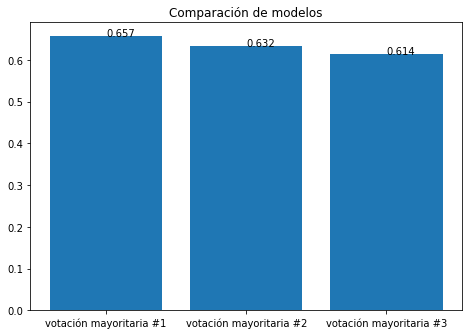

In [63]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ax.bar(modelos,f1score)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(modelos,f1score,plt)
plt.show()

In [60]:
modelos = ['votación ponderada #1','votación ponderada #2','votación ponderada #3']
f1score = [round(f1score_4,3),round(f1score_5,3),round(f1score_6,3)]
Accuracy = [round(Accuracy_4,3),round(Accuracy_5,3),round(Accuracy_6,3)]

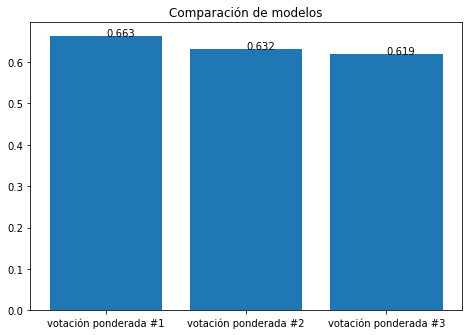

In [61]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ax.bar(modelos,f1score)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(modelos,f1score,plt)
plt.show()

### Análisis e inferencias

Se puede apreciar en las gráficas de barras presentadas anteriormente que los modelos estimados utilizando el método de votación ponderada son un poco mejor, aunque no mucho; que los modelos estimados con el método de votación mayoritaria. También es de particular ínteres apreciar que la restricción en la profundidad de los modelos puede afectar el desempeño de los mismos, lo anterior tiene mucha lógica teniendo en cuenta que este es unó de los parámetros de calibración de los árboles de desición, por otro lado se observa que los modelos de regresión presentaron las medidas de desempeño más bajas entre todos los modelos.